# Advertising Data

In [ ]:
# laster modellen med read.csv
advertising <- read.csv("http://www.uio.no/studier/emner/matnat/math/STK2100/data/advertising.csv")

In [39]:
# ser på head
head(advertising)

# ser her at X er overflødig, at TV, Radio og Newspaper er kovariatene vi ønsker å trene modellen på, og at Sales er det vi ønsker å predikere

,X,TV,Radio,Newspaper,Sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


In [40]:
fit.lm <- lm(Sales ~ TV + Radio + Newspaper, data = advertising)

summary(fit.lm)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


* Her får vi det velkjente R-summaryet. Først ser vi på residualene, vi ser at dataene har en lang hale mot venstre, altså er venstreskjev.
* Vi ser på koeffisienetene: t-verdiene til TV og radio er høye. Her er p-verdien meget lave, noe som betyr at en slik t-verdi ikke ville forekommet dersom H_0 var sann. 
* Vi kan derfor anta, sammen med `***` at både Intercept, TV, Radio er signifikante bidragsytere.
* Newspaper har en mye lavere t-verdi, og med en stor sannsynlighet (86%) for at nullhypotesen stemmer, med andre ord at denne ikke trenger å være med.

In [41]:
# Ønsker å teste videre for Newspaper med en t-test

N <- nrow(advertising) # antall data (rader)
p <- 3 # antall kovariater (kolonner)

beta.hat <- coef(fit.lm)[4] # koeffisienten til Newspaper
sigma.hat <- sqrt(sum(fit.lm$residuals^2) / (N - p - 1)) # Standardavviket til residualene
sigma.hat

[1] 1.68551

In [42]:
# dette er den samme tatt ut av summaryet (den står som Residual Standard Error der)

summary(fit.lm)$sigma

[1] 1.68551

In [43]:
X <- model.matrix(fit.lm) # henter ut designmatrisen X fra fit.lm
v <- solve(t(X) %*% X) # beregner inversen av XTX, altså (XTX)-1
se.beta.hat <- sigma.hat * sqrt(v[4, 4]) # kvadratrot til fjerde diagonalelement i (XTX)-1, som tilsvarer variansen til denne
se.beta.hat # standardfeilen til beta_4


[1] 0.00587101

In [44]:
# Verifiserer fra modellen

summary(fit.lm)$coef[4, 2]

[1] 0.00587101

In [45]:
t.obs <- beta.hat / se.beta.hat # observed t-statistic
t.obs

Newspaper 
-0.1767146

In [46]:
# Finner P-verdien

df <- N - p - 1 # frihetsgrader
qt(0.975, df) # finner den øvre 97.5% kvantilen i en t-fordeling med df frihetsgrader
2 * (1 - pt(abs(t.obs), df)) # P-verdien

[1] 1.972141

Newspaper 
0.8599151

In [47]:
# F-test for å finne effekten av alle tre kovariater ved å ta 
# forholdet mellom en modell med kun intercept og en modell med alle kovariatene

fit.null <- lm(Sales ~ 1, data = advertising) # modell med kun intercept
RSS <- sum(fit.lm$residuals^2) # RSS for modellen med alle kovariater
RSS.0 <- sum(fit.null$residuals^2) # RSS for modellen uten
q <- 3 # antall kovariater
F.obs <- ((RSS.0 - RSS) / q) / (RSS / (N - p - 1))

F.obs
qf(0.95, q, N - p - 1) # rejection level - dersom F.obs er større enn denne verdien, kan nullhypotesen forkastes og konkluderer med at minst én forklaringsvariabel har effekt
1 - pf(F.obs, q, N - p - 1) # P-value - dersom denne er <0.05 forkaster vi nullhypotesen og konkluderer med at fit.lm er bedre enn fit.null
anova(fit.null, fit.lm) # Sammenligningstest

[1] 570.2707

[1] 2.650677

[1] 0

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,199,5417.1487,NA,NA,NA,NA
2,196,556.8253,3,4860.323,570.2707,1.575227e-96


In [48]:
# Tester for kun Newspaper mot hele modellen nå

fit.news <- lm(Sales ~ Newspaper, data = advertising)
RSS.news <- sum(fit.news$residuals^2) # RSS for modellen med bare Newspaper
q <- 1 # antall kovariater brukt
F.obs <- ((RSS.news - RSS) / q) / (RSS / (N - p - 1))

F.obs
qf(0.95, q, N - p - 1)
1 - pf(F.obs, q, N - p - 1)
anova(fit.news, fit.lm)

[1] 1611.428

[1] 3.889341

[1] 0

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,198,5134.8045,NA,NA,NA,NA
2,196,556.8253,2,4577.979,805.7141,2.812622e-95


In [49]:
fit.news.radio <- lm(Sales ~ Newspaper + Radio, data = advertising)
RSS.news.radio <- sum(fit.news.radio$residuals^2)
q <- 2
F.obs <- ((RSS.news.radio - RSS) / q) / (RSS / (N - p - 1))

F.obs
qf(0.95, q, N - p - 1)
1 - pf(F.obs, q, N - p - 1)
anova(fit.news.radio, fit.lm)

[1] 538.2029

[1] 3.04199

[1] 0

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,197,3614.8353,NA,NA,NA,NA
2,196,556.8253,1,3058.01,1076.406,1.50996e-81


In [50]:
# Konfidensintervall for betaene
beta.hat + se.beta.hat * qt(c(0.025, 0.975), N - p - 1)
confint(fit.lm, level=0.95)

[1] -0.01261595  0.01054097

,2.5 %,97.5 %
(Intercept),2.32376228,3.55401646
TV,0.04301371,0.04851558
Radio,0.17154745,0.20551259
Newspaper,-0.01261595,0.01054097


* CI(intercept) Det er 95% sjanse for at intercepten befinner seg mellom 2.32 og 3.55
* CI(TV) Det er 95% sjanse for at en enhets økning i TV-reklame gir mellom 0.043 - 0.048 effekt
* CI(Radio) Det er 95% sjanse for at en enhets økning i radioreklame gir mellom 0.17 - 0.21 effekt
* CI(Newspaper) Siden 0 ligger i CI, kan vi ikke konkludere med om Newspaper har en effekt

In [51]:
# Konfidensintervall for E[Y | x] der x er tidligere usett
new.data <- data.frame(TV = 100, Radio = 20, Newspaper = 50) # oppretter én rad med TV=100, Radio=20, Newspaper=50
y.hat <- predict(fit.lm, new.data)
y.hat

1 
11.23408

In [53]:
x <- c(1, 100, 20, 50)
se.y.hat <- as.numeric(sigma.hat * sqrt(t(x) %*% v %*% x))
y.hat + se.y.hat * qt(c(0.025, 0.975), N - p - 1)
predict(fit.lm, new.data, interval="confidence")

[1] 10.86484 11.60332

,fit,lwr,upr
1,11.23408,10.86484,11.60332


In [54]:
# Prediksjonsintervall for Y på en ny x
y.hat + sqrt(sigma.hat^2 + se.y.hat^2) * qt(c(0.025, 0.975), N - p - 1)
predict(fit.lm, new.data, interval="predict")

[1]  7.88957 14.57859

,fit,lwr,upr
1,11.23408,7.88957,14.57859


# Credit Data

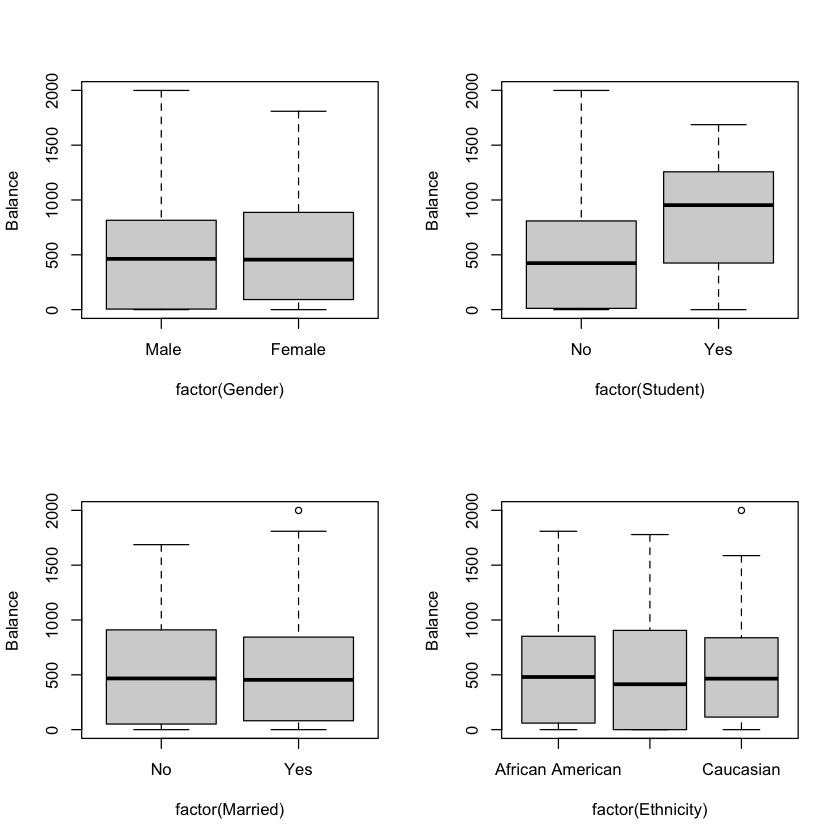

In [57]:
credit <- read.csv("http://www.uio.no/studier/emner/matnat/math/STK2100/data/credit.csv")

par(mfrow = c(2, 2), bg = "white")
boxplot(Balance ~ factor(Gender), data = credit)
boxplot(Balance ~ factor(Student), data = credit)
boxplot(Balance ~ factor(Married), data = credit)
boxplot(Balance ~ factor(Ethnicity), data = credit)
par(mfrow = c(1, 1))

* Boxplot: 
    * Strek: medianen i dataene
    * Boks: Q3 - Q1 = 75% - 25% = 50% av dataene
    * "Whiskers": 1.5IQR opp fra Q3 og ned fra Q1
    * Outliers vises over eller under dette 
* Vi ser at `Gender` her, samt `Married`, og også `Ethnicity` ikke har innbyrdes store variasjoner
* Dette kan tyde på at disse variablene ikke har stor innvirkning på resultatet
* Usikkerhetsmomenter: 
    * dersom dataene ikke er skalert, kan store forskjeller se små ut
    * dersom det er outliers i dataene, kan disse ha påvirkning
    * vi får ikke noen indikasjon på om data i kombinasjon med andre data er bra

In [58]:
# sjekker for kun income
fit.income <- lm(Balance ~ Income, data=credit)
summary(fit.income)


Call:
lm(formula = Balance ~ Income, data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-803.64 -348.99  -54.42  331.75 1100.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 246.5148    33.1993   7.425  6.9e-13 ***
Income        6.0484     0.5794  10.440  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 407.9 on 398 degrees of freedom
Multiple R-squared:  0.215,	Adjusted R-squared:  0.213 
F-statistic:   109 on 1 and 398 DF,  p-value: < 2.2e-16


In [75]:
# sjekker for kun student
fit.student <- lm(Balance ~ Student, data = credit)
summary(fit.student)


Call:
lm(formula = Balance ~ Student, data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-876.82 -458.82  -40.87  341.88 1518.63 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   480.37      23.43   20.50  < 2e-16 ***
StudentYes    396.46      74.10    5.35 1.49e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 444.6 on 398 degrees of freedom
Multiple R-squared:  0.06709,	Adjusted R-squared:  0.06475 
F-statistic: 28.62 on 1 and 398 DF,  p-value: 1.488e-07


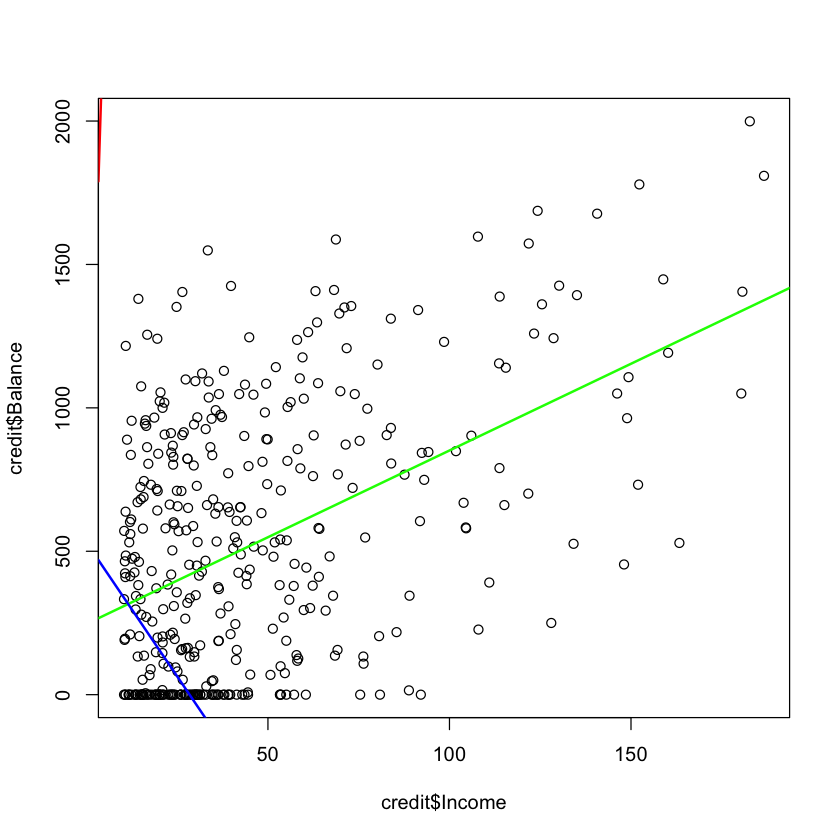

In [ ]:
par(bg = "white")
plot(credit$Income, credit$Balance)
abline(fit.income$coef[1], fit.income$coef[2], col = "green", lwd = 2)
abline(fit.student$coef[1], fit.student$coef[2], col = "red", lwd = 2)


In [76]:
fit.ethnicity <- lm(Balance ~ Ethnicity, data = credit)
summary(fit.ethnicity)


Call:
lm(formula = Balance ~ Ethnicity, data = credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-531.00 -457.08  -63.25  339.25 1480.50 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          531.00      46.32  11.464   <2e-16 ***
EthnicityAsian       -18.69      65.02  -0.287    0.774    
EthnicityCaucasian   -12.50      56.68  -0.221    0.826    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 460.9 on 397 degrees of freedom
Multiple R-squared:  0.0002188,	Adjusted R-squared:  -0.004818 
F-statistic: 0.04344 on 2 and 397 DF,  p-value: 0.9575


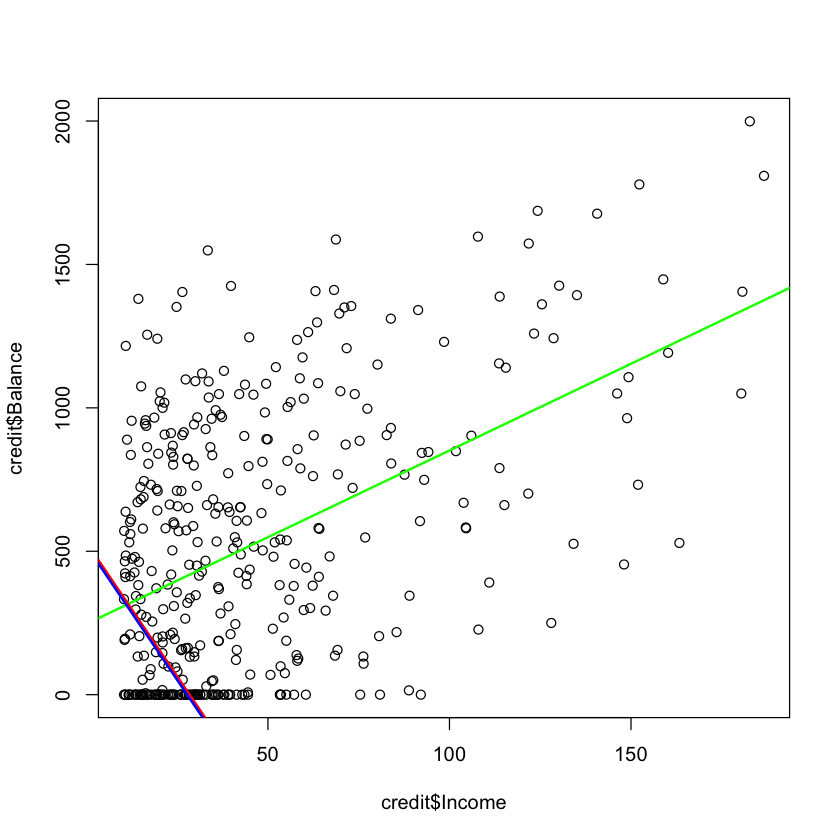

In [80]:
par(bg = "white")
plot(credit$Income, credit$Balance)
abline(fit.income$coef[1], fit.income$coef[2], col = "green", lwd = 2)
abline(fit.ethnicity$coef[1], fit.ethnicity$coef[2], col = "red", lwd = 2)
abline(fit.ethnicity$coef[1] + fit.ethnicity$coef[3], fit.ethnicity$coef[2], col = "blue", lwd = 2)

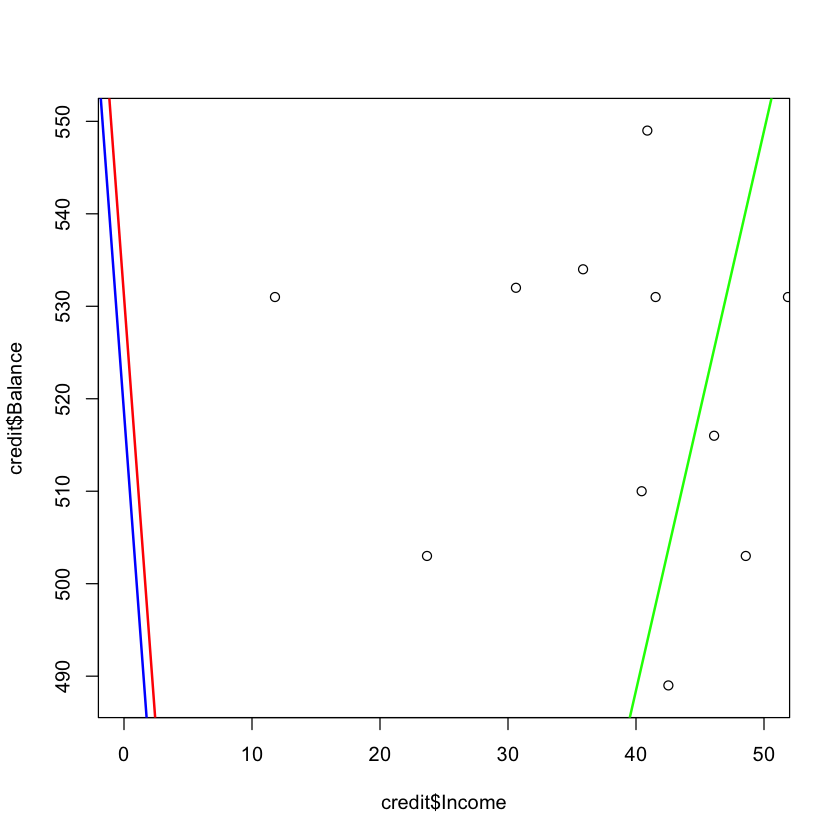

In [83]:
# zooming
par(bg = "white")
plot(credit$Income, credit$Balance, xlim = c(0, 50), ylim = c(488, 550))
abline(fit.income$coef[1], fit.income$coef[2], col = "green", lwd = 2)
abline(fit.ethnicity$coef[1], fit.ethnicity$coef[2], col = "red", lwd = 2)
abline(fit.ethnicity$coef[1] + fit.ethnicity$coef[3], fit.ethnicity$coef[2], col = "blue", lwd = 2)

# Subset selection

In [85]:
prostate <- read.csv("http://www.uio.no/studier/emner/matnat/math/STK2100/data/prostate.data", sep = "\t", header = TRUE)
prostate <- prostate[, -1] # fjerner første kolonne

In [87]:
head(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<lgl>
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829,TRUE
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189,TRUE
4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636,TRUE
6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678,TRUE


In [89]:
# training set
fit.lm <- lm(lpsa ~ . - train, data = prostate, subset = (train == TRUE))
summary(fit.lm)


Call:
lm(formula = lpsa ~ . - train, data = prostate, subset = (train == 
    TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64870 -0.34147 -0.05424  0.44941  1.48675 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.429170   1.553588   0.276  0.78334    
lcavol       0.576543   0.107438   5.366 1.47e-06 ***
lweight      0.614020   0.223216   2.751  0.00792 ** 
age         -0.019001   0.013612  -1.396  0.16806    
lbph         0.144848   0.070457   2.056  0.04431 *  
svi          0.737209   0.298555   2.469  0.01651 *  
lcp         -0.206324   0.110516  -1.867  0.06697 .  
gleason     -0.029503   0.201136  -0.147  0.88389    
pgg45        0.009465   0.005447   1.738  0.08755 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7123 on 58 degrees of freedom
Multiple R-squared:  0.6944,	Adjusted R-squared:  0.6522 
F-statistic: 16.47 on 8 and 58 DF,  p-value: 2.042e-12


In [90]:
library(leaps)

In [94]:
# Forward selection
nvmax <- 8
regfit.fwd <- regsubsets(lpsa ~ . - train, data = subset(prostate, train == TRUE), nvmax = nvmax, method = "forward")
summary.regfit.fwd <- summary(regfit.fwd)
show(summary.regfit.fwd)

Subset selection object
Call: regsubsets.formula(lpsa ~ . - train, data = subset(prostate, 
    train == TRUE), nvmax = nvmax, method = "forward")
8 Variables  (and intercept)
        Forced in Forced out
lcavol      FALSE      FALSE
lweight     FALSE      FALSE
age         FALSE      FALSE
lbph        FALSE      FALSE
svi         FALSE      FALSE
lcp         FALSE      FALSE
gleason     FALSE      FALSE
pgg45       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         lcavol lweight age lbph svi lcp gleason pgg45
1  ( 1 ) "*"    " "     " " " "  " " " " " "     " "  
2  ( 1 ) "*"    "*"     " " " "  " " " " " "     " "  
3  ( 1 ) "*"    "*"     " " " "  "*" " " " "     " "  
4  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     " "  
5  ( 1 ) "*"    "*"     " " "*"  "*" " " " "     "*"  
6  ( 1 ) "*"    "*"     " " "*"  "*" "*" " "     "*"  
7  ( 1 ) "*"    "*"     "*" "*"  "*" "*" " "     "*"  
8  ( 1 ) "*"    "*"     "*" "*"  "*" "*" "*"     "*"  


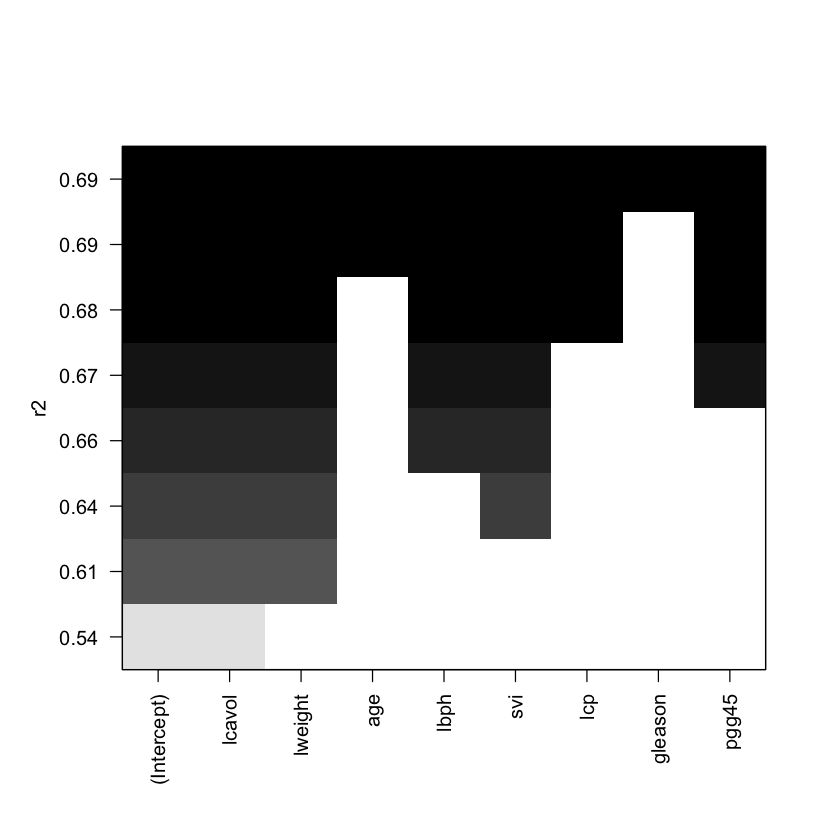

In [100]:
# R^2 when including each covariate
par(bg = "white")
plot(regfit.fwd, scale = "r2")

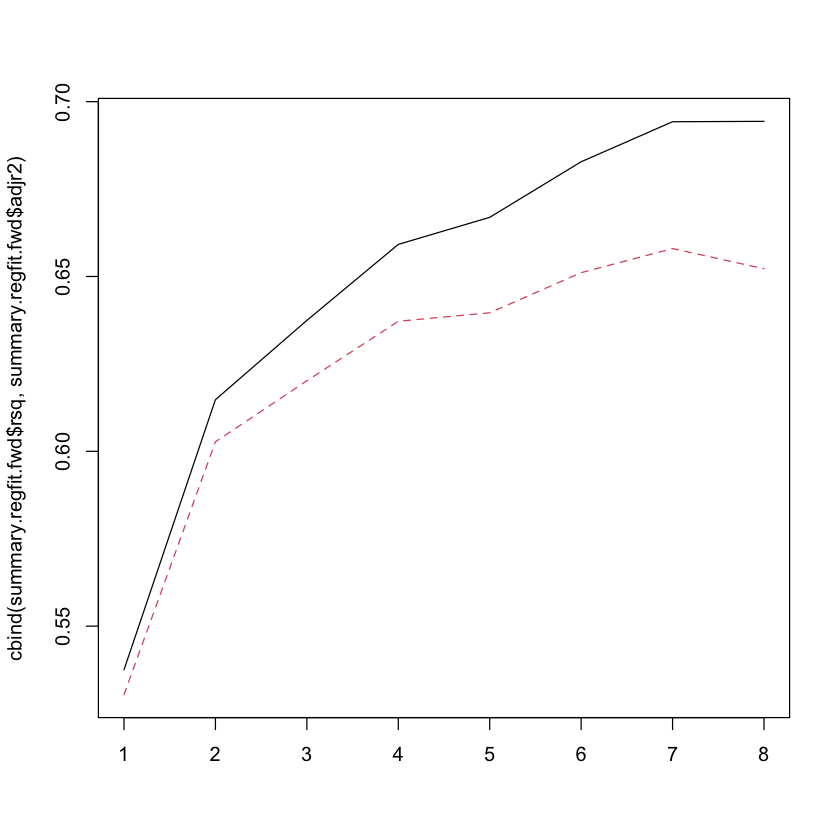

In [102]:
# R^2 and R_adj^2 against no. ov cov. in model
par(bg = "white")
matplot(cbind(summary.regfit.fwd$rsq, summary.regfit.fwd$adjr2), type="l")